![](imagenes_notebook/portada.png)
![](imagenes_notebook/ruta.png)

## Selección de Contexto y Problema

Se escogió el problema con base en los datos disponibles en la plataforma kaggle:

https://www.kaggle.com/datasets/pancachocaliente/calidad-del-aire-en-colombia?select=DATOS_DE_CALIDAD_DEL_AIRE_EN_COLOMBIA_2011-2018_20240311.csv

* **Problema específico**

Según la Organización Mundial de la Salud (OMS), se deben monitorear **los contaminantes criterio**, los cuales a través de diversos estudios epidemiológicos se determinaron como perjudiciales para la salud y el bienestar de los humanos, siendo los más comunes: 
- Partículas Suspendidas Totales (PST)
- Material Particulado menor a 10 micras (PM10)
- Material Particulado menor a 2.5 micras (PM2.5)
- Dióxido de Nitrógeno (NO2)
- Dióxido de Azufre (SO2)
- Ozono troposférico (O3)
- Monóxido de Carbono (CO)


* **Impacto del Negocio**

Si los ciudadanos tenemos información que ayude a predecir la contaminación del aire, podremos tomar medidas para proteger nuestra salud



***
* **Definición del Problema**
  
    *Desarrollar un modelo que prediga los niveles en el aire de **los contaminantes criterio** en una región y fechas dadas para tomar medidas preventivas cuando se estime que se alcanzaran valores peligrosos para la salud humana.*

***

## Análisis de Datos Básicos

#### 1. Carga y Exploración del Conjunto de Datos

* **Cargar el conjunto de datos en un DataFrame utilizando pandas:**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

path_data = "CALIDAD_AIRE.csv"
df = pd.read_csv(path_data, low_memory=False)

* **Observar cantidad de filas y columnas:**

In [4]:
print("Cantidad de filas y columnas del dataset: ",df.shape)

Cantidad de filas y columnas del dataset:  (20389245, 16)


* **Mostrar columnas y cantidad de datos por columna:**

In [6]:
df.count()

Fecha                             20389245
Autoridad Ambiental               20389245
Nombre de la estación             20389245
Tecnología                        15657064
Latitud                           20388880
Longitud                          20388880
Código del departamento           20388880
Departamento                      20388880
Código del municipio              20388880
Nombre del municipio              20388880
Tipo de estación                  20388880
Tiempo de exposición              20389245
Variable                          20389245
Unidades                          20389245
Concentración                     19006859
Nueva columna georreferenciada    20388880
dtype: int64

#### 2. Tipos de Datos

Cualitativos o categóricos:
Representan cualidades o categorías: *Nominales:* No presentan un criterio único para ordenarlos. Ej:  los colores, las materias de un curso, etc. *Ordinales:* tienen un criterio único de orden. Ej: los meses del año, el grado de estudios, el lugar obtenido en un concurso, etc.

Datos cuantitativos:
Datos cuyos valores son números: *Discretos:* Son los que se pueden contar. Ej: el número de respuestas correctas en un examen, los goles anotados en un partido, los lugares disponibles en un auditorio, etc. *Continuos:* Son los que se miden. Ej: el tiempo empleado para resolver un examen, la distancia de un lugar a otro, el peso de una persona, la temperatura ambiental, etc.


* **Identificar los tipos de datos de cada columna (numéricos, categóricos, booleanos, etc.):**

| Columna      | Tipo de dato      |
| ------------- | ------------- |
|Fecha |CUANTITATIVO - Continuo |
|Autoridad Ambiental |CATEGÓRICO - Nominal|
|Nombre de la estación |CATEGÓRICO - Nominal|
|Tecnología |CATEGÓRICO - Nominal|
|Latitud |CUANTITATIVO - Continuo|
|Longitud |CUANTITATIVO - Continuo|
|Código del Departamento |CATEGÓRICO - Ordinal|
|Departamento |CATEGÓRICO - Nominal|
|Código del municipio |CATEGÓRICO- Ordinal|
|Nombre del municipio |CATEGÓRICO - Nominal|
|Tipo de estación |CATEGÓRICO - Nominal|
|Tiempo de exposición| CUANTITATIVO - Continuo|
|Variable |CATEGÓRICO - Nominal|
|Unidades |CATEGÓRICO - Nominal|
|Concentración |CUANTITATIVO - Continuo|
|Nueva columna georreferenciada |CUANTITATIVO - Continuo|


* **Discutir la importancia de los tipos de datos en el análisis y modelado:**
Los tipos de datos son la base para encaminar el proceso del aprendizaje de máquina, se deben tener en cuenta para:

     - Seleccionar los algoritmos adecuados:  Algunos algoritmos funcionan mejor con cierto tipo de datos (regresión lineal - datos continuos, KNN - datos correctamente escalados, etc.)
     - El preprocesamiento de datos depende del tipo: normalización (datos numéricos), vectorización (datos categóricos), etc
     - Conocer los tipos de datos facilita la selección de visualizaciones apropiadas, datos numéricos (histogramas), datos categóricos (barras), etc.
     - El manejo de los valores faltantes depende del tipo de datos.Por ejemplo, numéricos con la media o mediana, categóricos con la moda, etc

    Lo anterior, entre otras consideraciones, **es esencial para obtener un modelo de machine learning robusto y confiable**


#### 2. Cantidad de Datos Faltantes

* **Detectar la cantidad de datos faltantes en cada columna:**


In [7]:
print(df.isna().sum()) #valores nulos x columna, tambien puede usarse df.isnull().sum() 

Fecha                                   0
Autoridad Ambiental                     0
Nombre de la estación                   0
Tecnología                        4732181
Latitud                               365
Longitud                              365
Código del departamento               365
Departamento                          365
Código del municipio                  365
Nombre del municipio                  365
Tipo de estación                      365
Tiempo de exposición                    0
Variable                                0
Unidades                                0
Concentración                     1382386
Nueva columna georreferenciada        365
dtype: int64


* **Discutir sobre el impacto que tiene los datos faltantes en el problema en cuestión en fases más avanzadas del desarrollo del modelo de machine learning:**

La identificación de valores faltantes es un paso crítico en el proceso de limpieza y preparación de datos. Los valores faltantes pueden influir en:

    - Resultados estadísticos: Las operaciones estadísticas como la media, mediana y desviación estándar pueden verse afectadas por la presencia de valores faltantes.

    - Análisis de datos: Los gráficos y visualizaciones pueden ser engañosos si no se manejan adecuadamente los valores faltantes.

    - Modelos de machine learning: Muchos algoritmos de aprendizaje automático no pueden manejar valores faltantes directamente y requieren que estos sean imputados o eliminados.


#### 3. Verificación de Reglas de Rango y Dominio

* **Identificar y marcar los datos basura, como valores erróneos o irrelevantes:**
  
  - Datos irrelevantes del set de datos:

| Columna      |
| ------------- |
|Autoridad Ambiental |
|Nombre de la estación |
|Tecnología |
|Código del Departamento |
|Código del municipio |
|Tipo de estación |
|Nueva columna georreferenciada |


   - Registros duplicados:


In [10]:
print(df.duplicated().sum())

8585


* **Revisar valores fuera de un rango esperado o texto en columnas numéricas:**

    - A veces, una columna se carga como tipo object porque contiene mezclas de texto y números, si se detecta que una columna numérica tiene tipo object, es probable que contenga texto. Revisamos entonces las columnas Latitud, Longitud, Concentación que deberian ser numéricas. En este caso los valores son numéricos:

In [8]:
subset = df[["Latitud", "Longitud", "Concentración"]]
print(subset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20389245 entries, 0 to 20389244
Data columns (total 3 columns):
 #   Column         Dtype  
---  ------         -----  
 0   Latitud        float64
 1   Longitud       float64
 2   Concentración  float64
dtypes: float64(3)
memory usage: 466.7 MB
None


   - Valores fuera de rango (outliers):
    Se pueden detectar usando el rango intercuartílico (IQR), una medida estadística que representa la diferencia entre el tercer cuartil (Q3) y el primer cuartil (Q1) de un conjunto de datos. Divide los datos en cuatro partes iguales y mide la amplitud del rango central (50% de los datos).

        Q1: El valor en el percentil 25 (25% de los datos están por debajo de este valor).
        Q3: El valor en el percentil 75 (75% de los datos están por debajo de este valor).
        IQR = Q3 - Q1: Rango central de los datos.

     Los valores fuera del rango esperado se calculan usando una distancia de 1.5 veces el IQR:

        Límite inferior: Q1−1.5×IQR
     
        Límite superior: Q3+1.5×IQR

     Los valores que estén fuera de estos límites se consideran **valores atípicos**.
    
     **Valores extremadamente atípicos**: Si se quiere detectar valores mucho más extremos, se puede usar un factor más alto, como 3 × IQR, para definir un segundo rango más amplio. Esto ayuda a diferenciar entre atípicos moderados y extremos.
    
        Límite inferior: Q1−3×IQR
     
        Límite superior: Q3+3×IQR
     
Lo anterior puede visualizarse con **gráficos de caja (boxplots)**, donde:

- El rango intercuartílico está representado por la caja.
- Los límites (bigotes) se extienden hasta Q1−1.5×IQR y Q3+1.5×IQR.
- Los puntos fuera de los bigotes se consideran atípicos.

Revisamos los valores atipicos para los **contaminantes criterio** estudiados:

Valores fuera del rango intercuartílico:
(315026, 18)


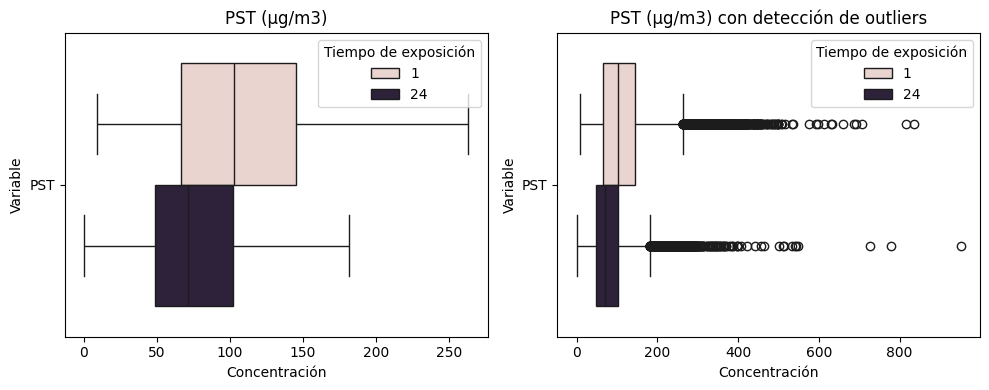

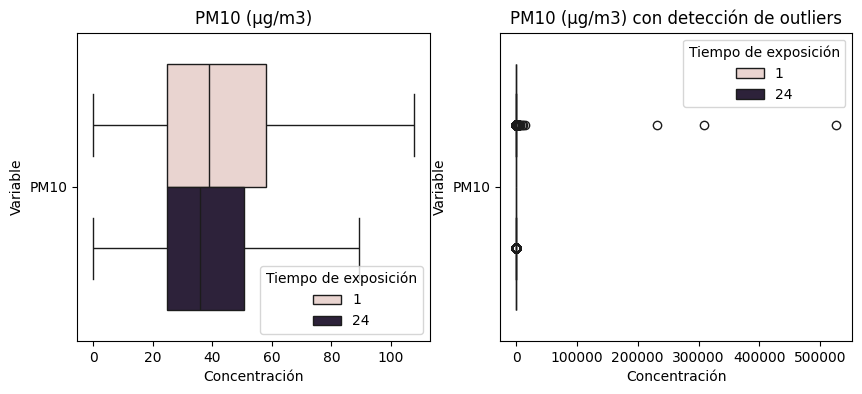

In [3]:
contaminantes = ['PST', 'PM10', 'PM2.5', 'NO2', 'SO2', 'O3', 'CO']  # Contaminantes criterio a estudiar
df_cc = df[df['Variable'].isin(contaminantes)]  # data frame de contaminantes criterio

Q1 = df_cc.groupby(['Variable', 'Tiempo de exposición'])['Concentración'].quantile(0.25) # Primer cuartil (percentil 25)
Q3 = df_cc.groupby(['Variable', 'Tiempo de exposición'])['Concentración'].quantile(0.75)  # Tercer cuartil (percentil 75)

# Calcular el rango intercuartílico
IQR = Q3 - Q1

# Definir límites para valores atípicos
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

#print(f"Límite inferior: {limite_inferior}, Límite superior: {limite_superior}")

# Restablecer el índice para los límites calculados
limite_inferior = limite_inferior.reset_index(name='limite_inferior')
limite_superior = limite_superior.reset_index(name='limite_superior')

# Unir los límites al DataFrame original
df_cc = df_cc.merge(limite_inferior, on=['Variable', 'Tiempo de exposición'])
df_cc = df_cc.merge(limite_superior, on=['Variable', 'Tiempo de exposición'])

# Identificar valores fuera del rango
fuera_de_rango = df_cc[(df_cc['Concentración'] < df_cc['limite_inferior']) | (df_cc['Concentración'] > df_cc['limite_superior'])]

# Mostrar los valores fuera del rango
print("Valores fuera del rango intercuartílico:")
print(fuera_de_rango.shape)


### Visualizar valores fuera de rango con boxplot

# Crear una figura y ejes para los subplots
fig, axes = plt.subplots(ncols=2, figsize=(10, 4))

# Añadir títulos y etiquetas a los subplots
axes[0].set_title(f"{contaminantes[0]} (μg/m3)")
axes[1].set_title(f"{contaminantes[0]} (μg/m3) con detección de outliers")

sns.boxplot(data=df_cc[(df_cc.Variable ==contaminantes[0])],
            y='Variable',               # Contaminantes en el eje y
            x='Concentración',          # Concentración en el eje x
            hue='Tiempo de exposición', # Separar por tiempo de exposición (opcional)
            showfliers=False,
            ax=axes[0]
)

sns.boxplot(data=df_cc[(df_cc.Variable ==contaminantes[0])],
            y='Variable',               # Contaminantes en el eje y
            x='Concentración',          # Concentración en el eje x
            hue='Tiempo de exposición', # Separar por tiempo de exposición (opcional)
            showfliers=True,
            ax=axes[1]
)

# Ajustar el espaciado entre los subplots
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(ncols=2, figsize=(10, 4))
axes[0].set_title(f"{contaminantes[1]} (μg/m3)")
axes[1].set_title(f"{contaminantes[1]} (μg/m3) con detección de outliers")

sns.boxplot(data=df_cc[(df_cc.Variable ==contaminantes[1])],
            y='Variable',               # Contaminantes en el eje y
            x='Concentración',          # Concentración en el eje x
            hue='Tiempo de exposición', # Separar por tiempo de exposición (opcional)
            showfliers=False,
            ax=axes[0]
)

sns.boxplot(data=df_cc[(df_cc.Variable ==contaminantes[1])],
            y='Variable',               # Contaminantes en el eje y
            x='Concentración',          # Concentración en el eje x
            hue='Tiempo de exposición', # Separar por tiempo de exposición (opcional)
            showfliers=True,
            ax=axes[1]
)
plt.show()